<a href="https://colab.research.google.com/github/juliicardozo/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario
materias = ['Matemáticas', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Informática']

# Crear un DataFrame vacío
df = pd.DataFrame(columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia', '1er Trimestre', '2do Trimestre', '3er Trimestre', 'Faltas'])


# Función para generar un nombre aleatorio
def generar_nombre():
    nombres = ["Juan", "Pedro", "Maria", "Ana", "Sofia", "Lucas", "Mateo", "Martina", "Camila", "Benjamin", "Emma", "Olivia", "Thiago", "Alejandro", "Isabella"]
    apellidos = ["Gomez", "Perez", "Rodriguez", "Gonzalez", "Martinez", "Lopez", "Sanchez", "Romero", "Fernandez", "Torres", "Vazquez", "Diaz", "Alvarez", "Garcia", "Silva"]

    return random.choice(nombres), random.choice(apellidos)


# Generar 100 filas de datos aleatorios
for i in range(100):
    nombre, apellido = generar_nombre()
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)

    nueva_fila = pd.DataFrame({'Apellido': [apellido], 'Nombre': [nombre], 'Nro_DNI': [dni], 'Materia': [materia],
                             '1er Trimestre': [nota1], '2do Trimestre': [nota2], '3er Trimestre': [nota3], 'Faltas': [faltas]})

    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

    Apellido     Nombre   Nro_DNI             Materia 1er Trimestre  \
0     Torres    Martina  11112569  Ciencias Naturales             2   
1      Gomez      Maria  10948507              Música             2   
2  Rodriguez        Ana  77624763         Informática             4   
3  Fernandez     Olivia  59285987    Educación Física            10   
4     Garcia     Camila  70027425            Biología             7   
5      Perez    Martina  70724705               Artes             7   
6      Lopez      Lucas  97035226            Biología             3   
7      Gomez      Pedro  41838458           Geografía            10   
8      Gomez  Alejandro  68128318         Matemáticas             1   
9  Fernandez      Pedro  82032011         Informática             7   

  2do Trimestre 3er Trimestre Faltas  
0             4             4     12  
1             1             1      9  
2             1            10      1  
3             9             6      1  
4             1        

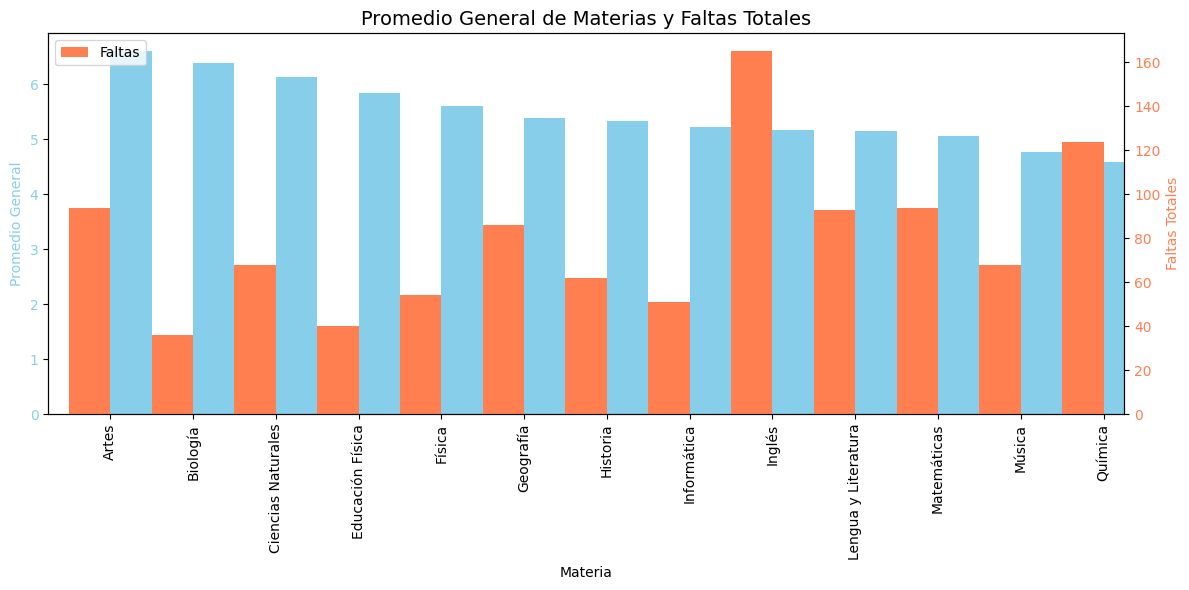

In [ ]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['1er Trimestre', '2do Trimestre', '3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', color='skyblue', ax=ax1, position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='bar', color='coral', ax=ax2, position=1)
ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Customize the plot
plt.title('Promedio General de Materias y Faltas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Materia')
plt.tight_layout()

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.show()

In [ ]:
df.to_csv("datos_alumnos.csv", index=False)
